In [1]:
import pandas as pd

In [41]:
#load dataset
df = pd.read_csv('data_set/train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [42]:
#filter dataset, consider only the "store=1" and its' "item=1"
df = df[df['store'] == 1]
df = df[df['item'] == 1]

In [43]:
#drop store
df.drop('store', axis=1, inplace=True)
#drop item
df.drop('item', axis=1, inplace=True)

In [44]:
#convert 'date' property to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [45]:
#Create new features to use in EDA
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday #0-monday 6-sunday

In [63]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
import numpy as np

## Linear Regression

### step 1 - feature selection

In [81]:
reg_df = df

In [82]:
# Lag features
for i in range(1,10):
    lag_i = 'lag_' + str(i)
    reg_df[lag_i] = reg_df.sales.shift(i)

In [83]:
# Rolling window
reg_df['rolling_mean'] = reg_df.sales.rolling(window=7).mean()
reg_df['rolling_max'] = reg_df.sales.rolling(window=7).max()
reg_df['rolling_min'] = reg_df.sales.rolling(window=7).min()
reg_df['rolling_std'] = reg_df.sales.rolling(window=7).std()

In [84]:
#drop null values
reg_df = reg_df.dropna(how='any', inplace=False)
df.head(10)

,date,sales,year,month,day,weekday,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,rolling_mean,rolling_max,rolling_min,lag_8,lag_9,rolling_std
0,2013-01-01,13,2013,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,11,2013,1,2,2,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,14,2013,1,3,3,11.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,13,2013,1,4,4,14.0,11.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,10,2013,1,5,5,13.0,14.0,11.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2013-01-06,12,2013,1,6,6,10.0,13.0,14.0,11.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2013-01-07,10,2013,1,7,0,12.0,10.0,13.0,14.0,11.0,13.0,NaN,11.857143,14.0,10.0,NaN,NaN,1.573592
7,2013-01-08,9,2013,1,8,1,10.0,12.0,10.0,13.0,14.0,11.0,13.0,11.285714,14.0,9.0,NaN,NaN,1.799471
8,2013-01-09,12,2013,1,9,2,9.0,10.0,12.0,10.0,13.0,14.0,11.0,11.428571,14.0,9.0,13.0,NaN,1.812654
9,2013-01-10,9,2013,1,10,3,12.0,9.0,10.0,12.0,10.0,13.0,14.0,10.714286,13.0,9.0,11.0,13.0,1.603567


In [85]:
# Split the series to predict the last 3 months of 2017
reg_df = reg_df.set_index('date')
reg_train_df = reg_df.loc[:'2017-09-30']                        
reg_test_df = reg_df.loc['2017-10-01':]

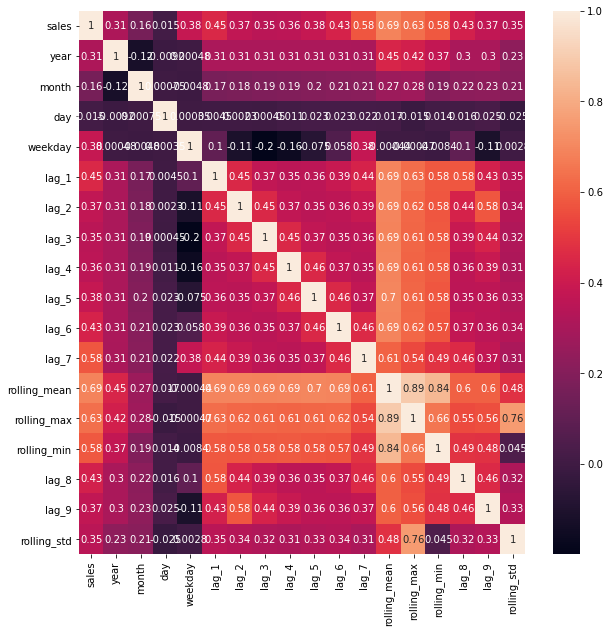

In [86]:
## correlation matrix
plt.figure(figsize=(10,10))
sn.heatmap(reg_train_df.corr(),annot=True)
plt.show()

In [71]:
X_train = reg_train_df.drop(['sales'], axis=1)
y_train = reg_train_df['sales'].values

X_test = reg_test_df.drop(['sales'], axis=1)
y_test = reg_test_df['sales'].values

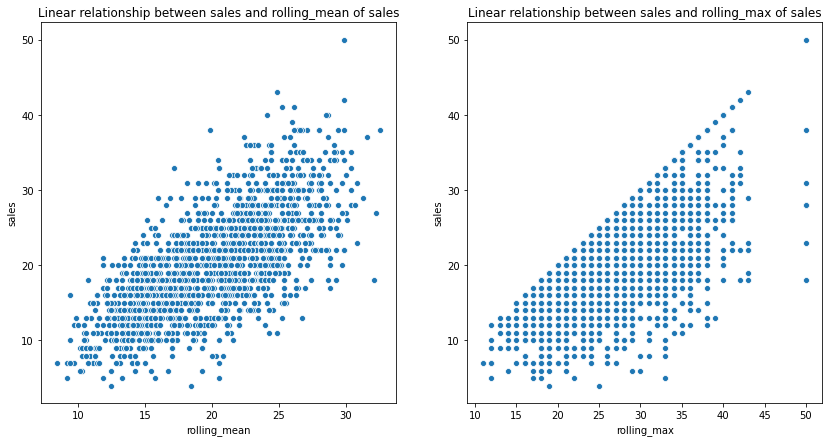

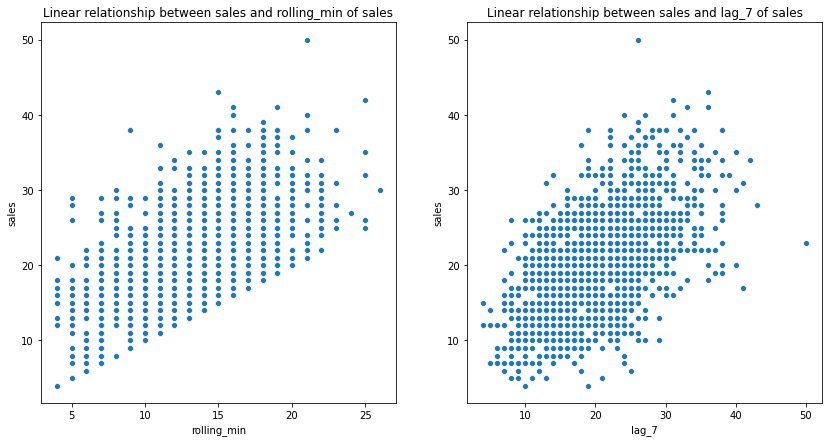

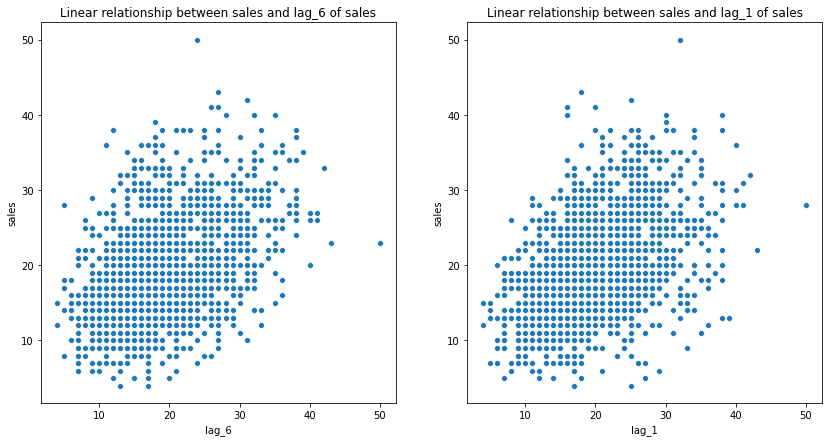

In [80]:
# Checking for a linear relationship of the top features with sales (target variable)
fig, axs = plt.subplots(ncols=2, figsize=(14,7))
sn.scatterplot(reg_train_df.rolling_mean, reg_train_df.sales, ax=axs[0])
axs[0].set(title='Linear relationship between sales and rolling_mean of sales')
sn.scatterplot(reg_train_df.rolling_max, reg_train_df.sales, ax=axs[1])
axs[1].set(title='Linear relationship between sales and rolling_max of sales')

fig, axs = plt.subplots(ncols=2, figsize=(14,7))
sn.scatterplot(reg_train_df.rolling_min, reg_train_df.sales, ax=axs[0])
axs[0].set(title='Linear relationship between sales and rolling_min of sales')
sn.scatterplot(reg_train_df.lag_7, reg_train_df.sales, ax=axs[1])
_ = axs[1].set(title='Linear relationship between sales and lag_7 of sales')

fig, axs = plt.subplots(ncols=2, figsize=(14,7))
sn.scatterplot(reg_train_df.lag_6, reg_train_df.sales, ax=axs[0])
axs[0].set(title='Linear relationship between sales and lag_6 of sales')
sn.scatterplot(reg_train_df.lag_1, reg_train_df.sales, ax=axs[1])
_ = axs[1].set(title='Linear relationship between sales and lag_1 of sales')

In [73]:
# update X_train, X_test to include top features
X_train = X_train[['rolling_mean', 'rolling_max', 'rolling_min', 'lag_7', 'lag_6', 'lag_1']]
X_test = X_test[['rolling_mean', 'rolling_max', 'rolling_min', 'lag_7', 'lag_6', 'lag_1']]

In [74]:
# fit model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
preds = model.predict(X_test)

errors_df = reg_test_df[['sales']]
errors_df['pred_sales'] = preds
errors_df['errors'] = preds - y_test
errors_df.insert(0, 'model', 'LinearRegression')

<ipython-input-75-eb79803f9a7f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors_df['pred_sales'] = preds
<ipython-input-75-eb79803f9a7f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors_df['errors'] = preds - y_test


In [76]:
def mae(err):
    return np.mean(np.abs(err))

def rmse(err):
    return np.sqrt(np.mean(err ** 2))

def mape(err, sales=errors_df['sales']):
    return np.sum(np.abs(err))/np.sum(sales) * 100

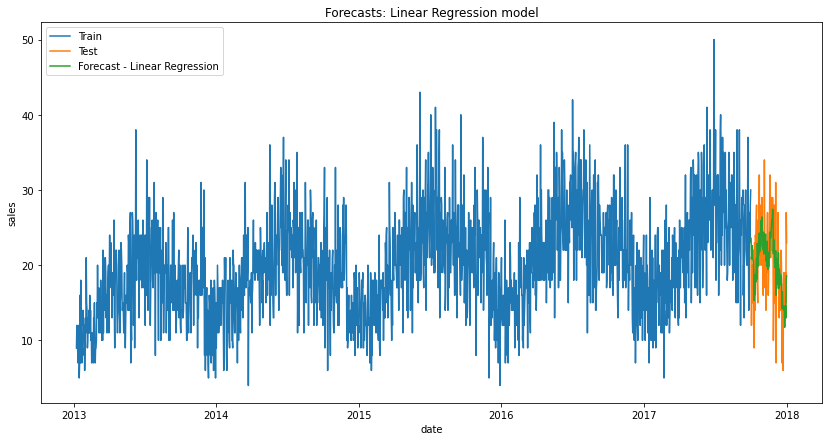

In [77]:
fig = plt.figure(figsize=(14,7))
plt.plot(reg_train_df.index, reg_train_df['sales'], label='Train')
plt.plot(reg_test_df.index, reg_test_df['sales'], label='Test')
plt.plot(errors_df.index, errors_df['pred_sales'], label='Forecast - Linear Regression')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('sales')
plt.title('Forecasts: Linear Regression model')
plt.show()

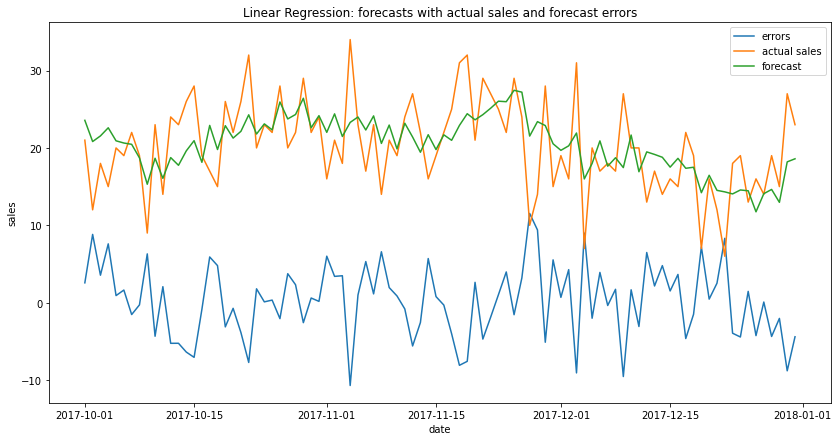

In [78]:
fig = plt.figure(figsize=(14,7))
plt.plot(errors_df.index, errors_df.errors, label='errors')
plt.plot(errors_df.index, errors_df.sales, label='actual sales')
plt.plot(errors_df.index, errors_df.pred_sales, label='forecast')
plt.legend(loc='best')
plt.xlabel('date')
plt.ylabel('sales')
plt.title('Linear Regression: forecasts with actual sales and forecast errors')
plt.show()

In [79]:
result_df_lr = errors_df.groupby('model').agg(total_sales=('sales', 'sum'),
                                          total_pred_sales=('pred_sales', 'sum'),
                                          LR_overall_error=('errors', 'sum'),
                                          MAE=('errors', mae),
                                          RMSE=('errors', rmse), 
                                          MAPE=('errors', mape))
result_df_lr

,total_sales,total_pred_sales,LR_overall_error,MAE,RMSE,MAPE
model,,,,,,
LinearRegression,1861,1881.348669,20.348669,3.837581,4.743857,18.971384
